Code to generate Fig. 2 in the paper, where a qubit's energy and time uncertainties are plotted as a function of Bloch sphere angle $\theta$.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import scipy.integrate
import qutip as qt
from helper import *

Now import required functions from ```singlespin.py```.

In [2]:
from singlespin import *

The below function is used to generate the plot.

Input parameter details:


- `t_final`: The $T_F$ used in the continuous time relation.
- `t_counts`: Number of discrete time steps to use in the discrete time relation.
- `save_graph`: a boolean parameter that is 1 if you want the plot to be saved to disk as `fig.eps`, and 0 if you wish the plot to be shown via matplotlib. Default = 0.
- `ham_coeff`: Hamiltonian is `ham_coeff` $\sigma_z$. Default = 1.
- `coarse`: a boolean parameter that is used to speed up running of code when testing. When set to 1, only 100 data points are used. When set to 0, 500 points are used. Default = 0.


In the discrete time relation, the set of times $\mathcal{T}$ has `t_counts` + 1 elements, spanning integers from $0$ to `t_final`.


In [3]:
def iterate_theta(t_final, t_counts, save_graph = 0, ham_coeff = 1., coarse = 0):
    if coarse == 1:
        n = 100
    else:
        n = 500
    thetas = np.linspace(0, np.pi, n)
    s = np.zeros(n)
    dS = np.zeros(n)
    infd = np.zeros(n)
    count = 0
    for theta in thetas:
        (stemp, infdtemp) = calc_lhs(theta, ham_coeff, t_final)
        dS[count] = calc_discrete_S(theta, ham_coeff, t_counts, t_spacing = t_final/t_counts)
        s[count] = stemp
        infd[count] = infdtemp
        count += 1
    matplotlib.rc('text', usetex = True)
    matplotlib.rc('xtick', labelsize=48) 
    matplotlib.rc('ytick', labelsize=48)
    plt.rcParams.update({'axes.titlesize': 'large'})
    fig = plt.figure()
    f,ax=plt.subplots(figsize=(20,10))
    line_ds, = plt.plot(thetas, dS, label='$S(T|A)_{\kappa}$', color = 'blue', linestyle = '--')
    line_discrete, = plt.plot(thetas, dS + infd, label='Total Uncertainty (D)', color = 'blue')
    line_s, = plt.plot(thetas, s, label=r'$s(T|A)$', color = 'red', linestyle = '--')
    line_e, = plt.plot(thetas, infd, label=r'$\inf_{\sigma:\left[  H,\sigma\right] =0} D(\rho_A\Vert\sigma)$', color = 'black')
    line_cont, = plt.plot(thetas, s + infd, label="Total Uncertainty (C)", color = "red")
    line_bound, = plt.plot(thetas, np.ones(n)*log2(t_final), label=r'$\log T_F = 1$', color = 'black', linestyle = '--')
    plt.legend(handles = [ line_e, line_bound, line_ds, line_s,line_discrete, line_cont] , prop = {'size': 32}, labelspacing= 0.25, loc = 'lower left', bbox_to_anchor=(0, 1.02, 1, 0.2 ), mode = 'expand', ncol = 3)
    plt.xlabel(r'$\theta$ (with z-axis of Bloch Sphere)', fontsize='40')
    plt.ylabel('Uncertainty (bits)', fontsize='40')
    plt.xlim(0,np.pi)
    plt.ylim(0,1.2)
    plt.xticks([0, np.pi/2, np.pi], ['$0$', r'$\pi/2$', r'$\pi$'] )
    if save_graph == 1:
        plt.savefig('fig.eps', format = 'eps', dpi = 500, bbox_inches="tight")
    else:
        plt.show()

Specific function call to generate Fig. 2

<Figure size 432x288 with 0 Axes>

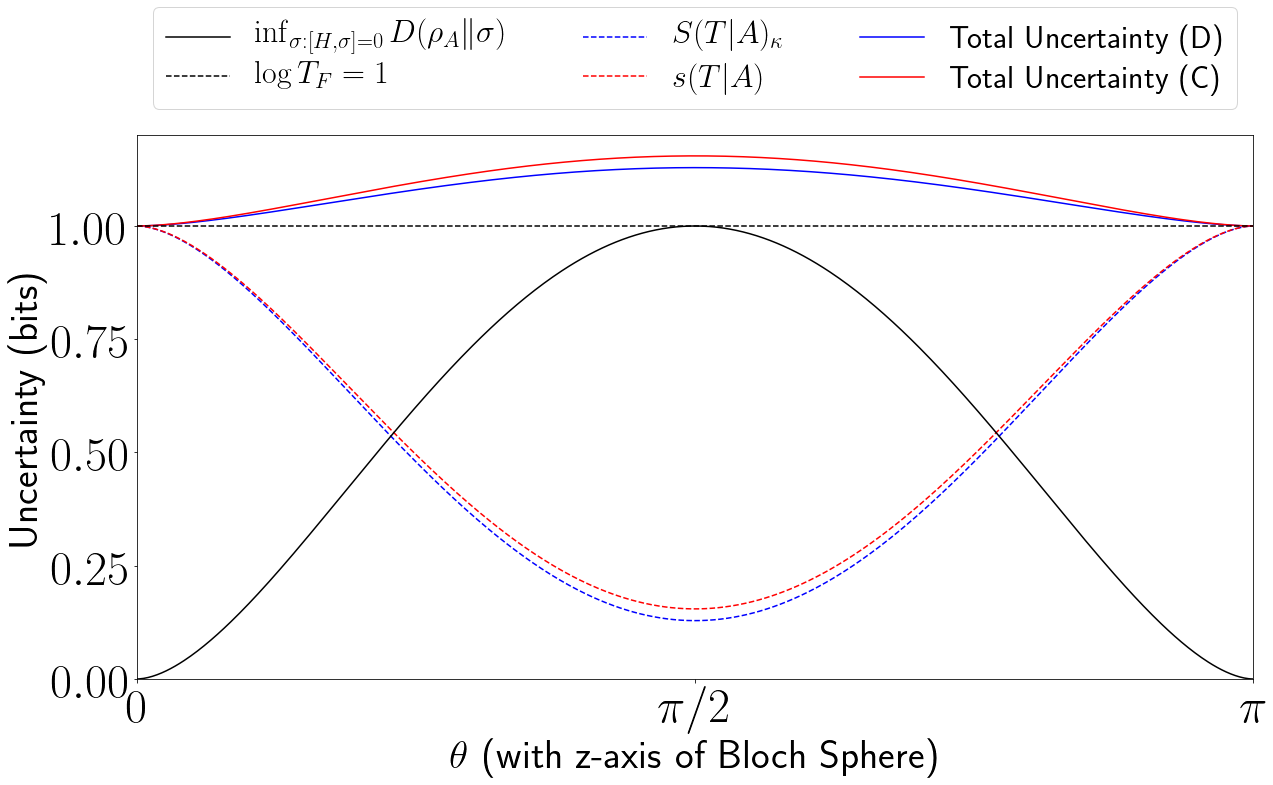

In [4]:
iterate_theta(2, 1, save_graph = 1, ham_coeff = 1., coarse = 0)